In [37]:
import pandas as pd
import GeneralETL_PyFile as ETL
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

tech_df = ETL.tech_df
print(tech_df)

0               NAICS2017_LABEL SEX_LABEL ETH_GROUP_LABEL RACE_GROUP_LABEL  \
1         Total for all sectors     Total           Total            Total   
2         Total for all sectors     Total           Total            Total   
3         Total for all sectors     Total           Total            Total   
4         Total for all sectors     Total           Total            Total   
5         Total for all sectors     Total           Total            Total   
...                         ...       ...             ...              ...   
5496  Industries not classified     Total           Total            Total   
5497  Industries not classified     Total           Total            Total   
5498  Industries not classified     Total           Total            Total   
5499  Industries not classified     Total           Total            Total   
5500  Industries not classified     Total           Total            Total   

0    VET_GROUP_LABEL NSFSZFI_LABEL FACTORS_P  \
1              

Filter out all unique industries. Look at questions just based on the whole market.
Also filter out all demographic groups, only looking at totals.
Done using several filter statements in the same line, in parentheses and with & in between.

In [38]:
tech_df = tech_df[tech_df['NAICS2017_LABEL'] == 'Total for all sectors']
tech_df.shape


(4400, 16)

In [39]:
tech_df = tech_df[(tech_df['SEX_LABEL'] == 'Total') & (tech_df['ETH_GROUP_LABEL'] == 'Total') & (tech_df['RACE_GROUP_LABEL'] == 'Total') & (tech_df['VET_GROUP_LABEL'] == 'Total') & (tech_df['NSFSZFI_LABEL'] == 'All firms')]
tech_df.shape
tech_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 1 to 55
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAICS2017_LABEL   55 non-null     object
 1   SEX_LABEL         55 non-null     object
 2   ETH_GROUP_LABEL   55 non-null     object
 3   RACE_GROUP_LABEL  55 non-null     object
 4   VET_GROUP_LABEL   55 non-null     object
 5   NSFSZFI_LABEL     55 non-null     object
 6   FACTORS_P         55 non-null     object
 7   FACTORS_P_LABEL   55 non-null     object
 8   FIRMPDEMP         55 non-null     object
 9   FIRMPDEMP_PCT     55 non-null     object
 10  RCPPDEMP          55 non-null     object
 11  RCPPDEMP_PCT      55 non-null     object
 12  EMP               55 non-null     object
 13  EMP_PCT           55 non-null     object
 14  PAYANN            55 non-null     object
 15  PAYANN_PCT        55 non-null     object
dtypes: object(16)
memory usage: 3.9+ KB


Now we want to break into separate dataframes for each technology, so we can plot the answers for each tech, possibly on same plot.

In [40]:
AI_df = tech_df[tech_df['FACTORS_P'].str.contains('T1')]
CloudB_df = tech_df[tech_df['FACTORS_P'].str.contains('T2')]
SpecSW_df = tech_df[tech_df['FACTORS_P'].str.contains('T3')]
Robo_df = tech_df[tech_df['FACTORS_P'].str.contains('T4')]
SpecEQ_df = tech_df[tech_df['FACTORS_P'].str.contains('T5')]

Cast all numeric columns to floats

In [41]:
print(AI_df.columns)
# get a list of the column names that are purely numeric so we can cast all to floats
numeric_colnames = AI_df.columns[8:]
print(numeric_colnames)

for colname in numeric_colnames:
    AI_df[colname] = AI_df[colname].astype(float)
    CloudB_df[colname] = CloudB_df[colname].astype(float)
    SpecSW_df[colname] = SpecSW_df[colname].astype(float)
    Robo_df[colname] = Robo_df[colname].astype(float)
    SpecEQ_df[colname] = SpecEQ_df[colname].astype(float)



Index(['NAICS2017_LABEL', 'SEX_LABEL', 'ETH_GROUP_LABEL', 'RACE_GROUP_LABEL',
       'VET_GROUP_LABEL', 'NSFSZFI_LABEL', 'FACTORS_P', 'FACTORS_P_LABEL',
       'FIRMPDEMP', 'FIRMPDEMP_PCT', 'RCPPDEMP', 'RCPPDEMP_PCT', 'EMP',
       'EMP_PCT', 'PAYANN', 'PAYANN_PCT'],
      dtype='object', name=0)
Index(['FIRMPDEMP', 'FIRMPDEMP_PCT', 'RCPPDEMP', 'RCPPDEMP_PCT', 'EMP',
       'EMP_PCT', 'PAYANN', 'PAYANN_PCT'],
      dtype='object', name=0)


C:\Users\cbevr\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\cbevr\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cbevr\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

Now that we are split up nicely, we try plotting these on the same bar chart

[ 0  1  2  3  4  5  6  7  8  9 10]
[-2 -1  0  1  2  3  4  5  6  7  8]


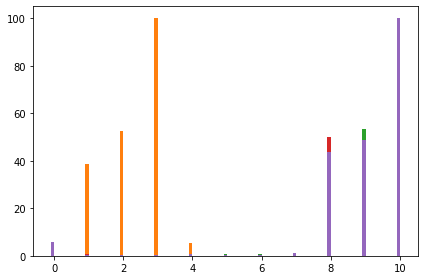

In [50]:
# list of all columns we want to graph, also a list of tech names to call for legend
tech_names = ['AI','Cloud Based','Special Software','Robotics','Special Equipment']
firmpdemp_pctVALS = [AI_df['FIRMPDEMP_PCT'],CloudB_df['FIRMPDEMP_PCT'],SpecSW_df['FIRMPDEMP_PCT'],Robo_df['FIRMPDEMP_PCT'],SpecEQ_df['FIRMPDEMP_PCT']]

x = np.arange(len(AI_df['FACTORS_P_LABEL'].unique()))
width = 0.35

# intialize subplots to add clustered bar
fig,ax = plt.subplots()
#for count,tech in enumerate(firmpdemp_pctVALS):
AIplot = ax.bar(x - width/2,tech[0],width,label=tech_names[count])
CloudBplot = ax.bar(x - width/2,tech[0],width,label=tech_names[count])

fig.tight_layout()
plt.show()